# BUYMAのバイヤー情報の分析

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pymysql
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 14,4.5
rcParams['figure.dpi'] = 200
%matplotlib inline

In [2]:
try:
    conn = pymysql.connect(host='hostname', user='username', passwd='password', db='dbname', charset='utf8')
    cur = conn.cursor(pymysql.cursors.DictCursor)
except:
    print("Unexpected DB connect Error:", sys.exc_info()[0])

0

## バイヤー情報テーブルのレコード確認

In [3]:
df = pd.read_sql_query("SELECT * FROM buymaBuyerInfo ORDER BY numItemsOnSale", conn)
df = df.replace('\t',' ', regex=True)
df

,buyerId,buyerName,buyerKind,buyerCountry,gender,shipDaysAve,soldTotal,buySuccess,numItemsOnSale,registDate,buyerBrand1,buyerBrand2,buyerBrand3,updated_at,onSaleItemCrawled
0,260560,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-08
1,306022,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-16,2019-04-08
2,751098,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-18,2019-04-09
3,831974,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-18,2019-04-05
4,1060495,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-16
5,1085635,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-04
6,1457604,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-04
7,1548780,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-21
8,1665948,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-04
9,1917730,ページ取得失敗,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,2019-04-15,2019-04-15


## バイヤーの出品数ヒストグラムを表示

(array([ 868.,  472.,  306.,  228.,  155.,  127.,  113.,   86.,   76.,
          59.,   52.,   44.,   42.,   40.,   31.,   31.,   28.,   20.,
          15.,   14.,   14.,   16.,   16.,   11.,   16.,    9.,   10.,
          11.,    9.,   16.,    7.,    9.,    7.,   11.,   10.,    4.,
          10.,    5.,    5.,   11.,   12.,   11.,    3.,    2.,    3.,
           3.,    1.,    0.,    3.,    5.]),
 array([    0.,   120.,   240.,   360.,   480.,   600.,   720.,   840.,
          960.,  1080.,  1200.,  1320.,  1440.,  1560.,  1680.,  1800.,
         1920.,  2040.,  2160.,  2280.,  2400.,  2520.,  2640.,  2760.,
         2880.,  3000.,  3120.,  3240.,  3360.,  3480.,  3600.,  3720.,
         3840.,  3960.,  4080.,  4200.,  4320.,  4440.,  4560.,  4680.,
         4800.,  4920.,  5040.,  5160.,  5280.,  5400.,  5520.,  5640.,
         5760.,  5880.,  6000.]),
 <a list of 50 Patch objects>)

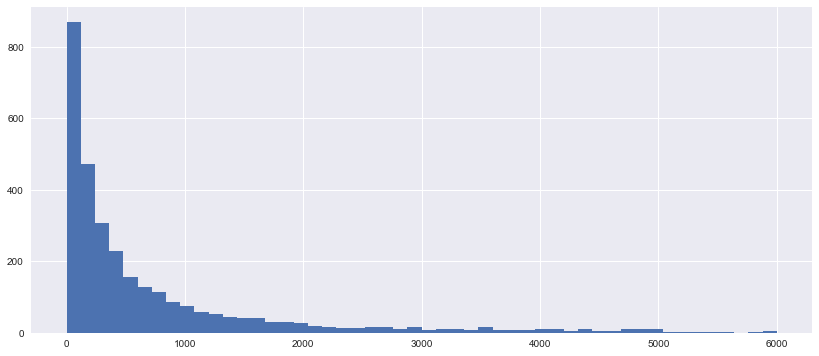

In [4]:
dfNonNa = df.dropna()
dfNumItemsOnSale = dfNonNa.numItemsOnSale
plt.figure(figsize=(14,6))
plt.hist(dfNumItemsOnSale,bins=50,range=(0,6000))

## バイヤーの販売数ヒストグラムを表示

(array([  0.,   0.,   0.,   0.,   0.,  10.,  36.,  50.,  61.,  51.,  50.,
         46.,  44.,  50.,  37.,  44.,  32.,  34.,  35.,  25.,  25.,  32.,
         30.,  21.,  21.,  21.,  22.,  25.,  21.,  22.,  13.,  21.,  27.,
         23.,  17.,  16.,  27.,  22.,  21.,  16.,  11.,  19.,   8.,  14.,
         16.,  12.,  17.,  19.,   9.,  13.]),
 array([   0.,    6.,   12.,   18.,   24.,   30.,   36.,   42.,   48.,
          54.,   60.,   66.,   72.,   78.,   84.,   90.,   96.,  102.,
         108.,  114.,  120.,  126.,  132.,  138.,  144.,  150.,  156.,
         162.,  168.,  174.,  180.,  186.,  192.,  198.,  204.,  210.,
         216.,  222.,  228.,  234.,  240.,  246.,  252.,  258.,  264.,
         270.,  276.,  282.,  288.,  294.,  300.]),
 <a list of 50 Patch objects>)

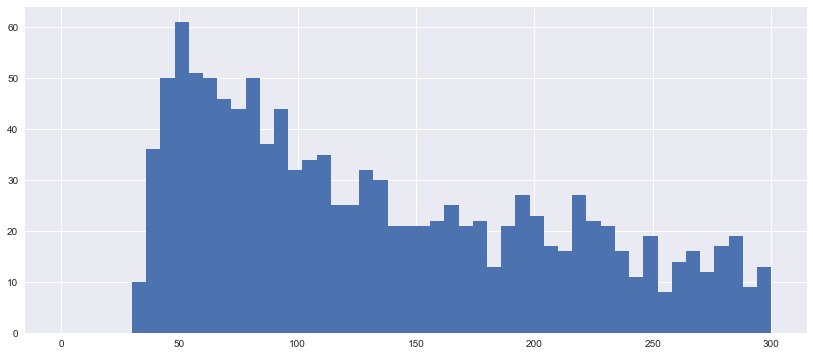

In [5]:
dfSoldTotal = dfNonNa.soldTotal
plt.figure(figsize=(14,6))
plt.hist(dfSoldTotal,bins=50,range=(0,300))

## 平均配送日数ヒストグラムを表示

(array([ 312.,  424.,  379.,  415.,  363.,  268.,  244.,  177.,  116.,
         129.,  104.,   82.,   41.,   36.,   14.,    5.,    2.,    3.,
           0.,    0.]),
 array([  1.  ,   1.95,   2.9 ,   3.85,   4.8 ,   5.75,   6.7 ,   7.65,
          8.6 ,   9.55,  10.5 ,  11.45,  12.4 ,  13.35,  14.3 ,  15.25,
         16.2 ,  17.15,  18.1 ,  19.05,  20.  ]),
 <a list of 20 Patch objects>)

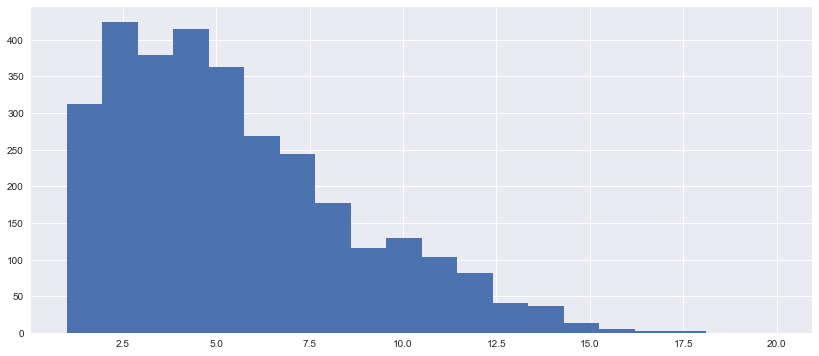

In [6]:
dfShipDaysAve = dfNonNa.shipDaysAve
plt.figure(figsize=(14,6))
plt.hist(dfShipDaysAve,bins=20,range=(1,20))

## 買い付け成功率ヒストグラム表示

(array([   0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,
           3.,    3.,    1.,    0.,    0.,    2.,    4.,    4.,    5.,
           5.,    7.,    5.,    8.,   15.,   19.,   15.,   17.,   23.,
          26.,   37.,   38.,   53.,   56.,   68.,   85.,   90.,   93.,
         113.,  117.,  136.,  129.,  159.,  144.,  174.,  180.,  186.,
         201.,  217.,  257.,  233.,  183.]),
 array([  51.  ,   51.98,   52.96,   53.94,   54.92,   55.9 ,   56.88,
          57.86,   58.84,   59.82,   60.8 ,   61.78,   62.76,   63.74,
          64.72,   65.7 ,   66.68,   67.66,   68.64,   69.62,   70.6 ,
          71.58,   72.56,   73.54,   74.52,   75.5 ,   76.48,   77.46,
          78.44,   79.42,   80.4 ,   81.38,   82.36,   83.34,   84.32,
          85.3 ,   86.28,   87.26,   88.24,   89.22,   90.2 ,   91.18,
          92.16,   93.14,   94.12,   95.1 ,   96.08,   97.06,   98.04,
          99.02,  100.  ]),
 <a list of 50 Patch objects>)

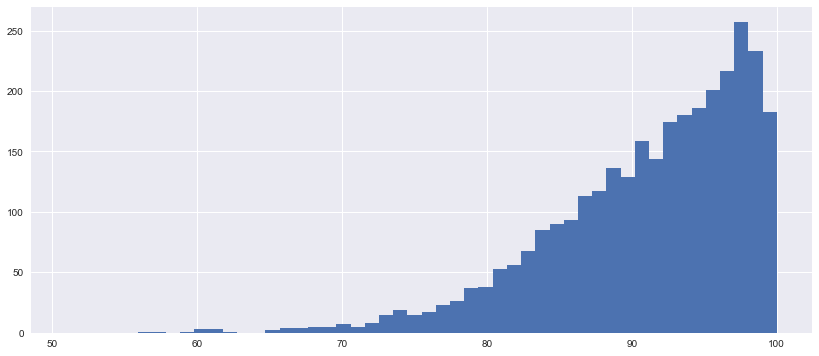

In [7]:
dfBuySuccess = dfNonNa.buySuccess
plt.figure(figsize=(14,6))
plt.hist(dfBuySuccess,bins=50,range=(51,100))

## 出品数と買い付け成功率の散布図表示

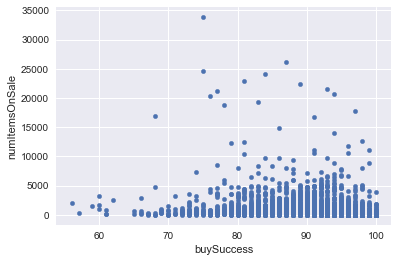

In [8]:
dfNonNa.plot(kind='scatter', x='buySuccess', y='numItemsOnSale')

## 出品数と買い付け成功率のヒストグラム付き散布図表示

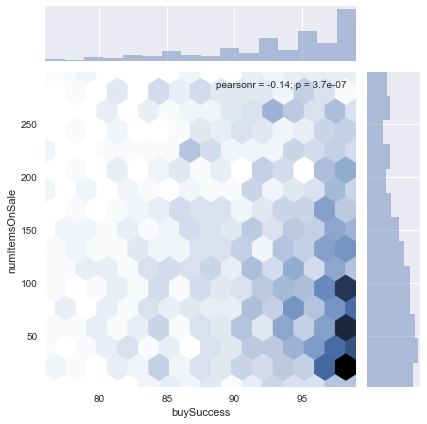

In [9]:
xp = 'buySuccess'
yp = 'numItemsOnSale'
xl = 75
xh = 100
yl = 0
yh = 300
sns.jointplot(x=xp, y=yp, data=dfNonNa[(dfNonNa[xp] >xl) & (dfNonNa[xp] < xh) & (dfNonNa[yp] > yl) & (dfNonNa[yp] < yh)] ,kind="hex", gridsize=15)

## 買い付け成功率と平均配送日数のヒストグラム付き散布図表示

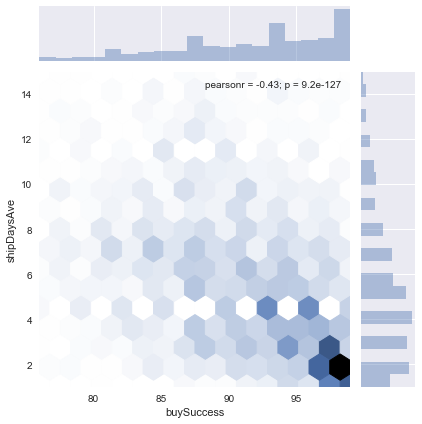

In [10]:
sns.jointplot(x='buySuccess', y='shipDaysAve', data=dfNonNa[(dfNonNa['buySuccess'] >75) & (dfNonNa['buySuccess'] < 100) & (dfNonNa['shipDaysAve'] > 0) & (dfNonNa['shipDaysAve'] < 16)] ,kind="hex", gridsize=15)

## 出品数と販売数の散布図表示

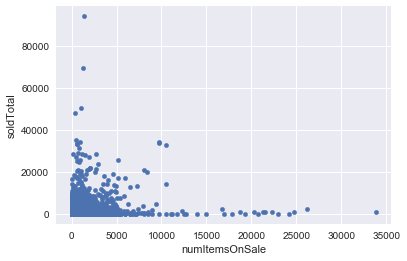

In [11]:
dfNonNa.plot(kind='scatter', x='numItemsOnSale', y='soldTotal')

## 出品数と販売数のヒストグラム付き散布図表示

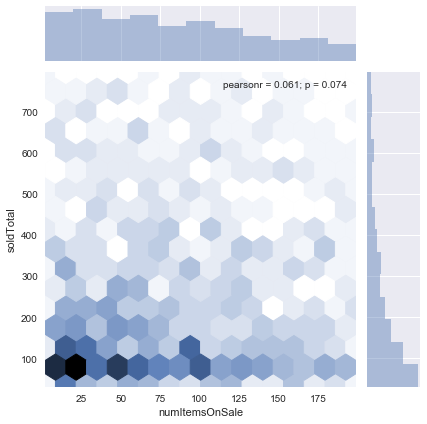

In [12]:
sns.jointplot(x='numItemsOnSale', y='soldTotal', data=dfNonNa[(dfNonNa['numItemsOnSale'] > 0) & (dfNonNa['numItemsOnSale'] < 200) & (dfNonNa['soldTotal'] > 0) & (dfNonNa['soldTotal'] < 800)] ,kind="hex", gridsize=15)

## 出品数と販売数のヒストグラム付き散布図表示（限定区間）

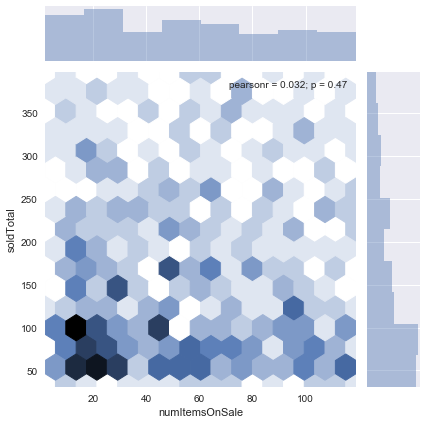

In [13]:
xp = 'numItemsOnSale'
yp = 'soldTotal'
xl = 0
xh = 120
yl = 0
yh = 400
sns.jointplot(x=xp, y=yp, data=dfNonNa[(dfNonNa[xp] >xl) & (dfNonNa[xp] < xh) & (dfNonNa[yp] > yl) & (dfNonNa[yp] < yh)] ,kind="hex", gridsize=15)

## バイヤーの在籍国の表

In [14]:
dfNonNa[['buyerCountry']].apply(pd.value_counts).rename(columns={'buyerCountry': '人数'}, inplace=False)

,人数
日本,1663
アメリカ合衆国,658
韓国,179
イギリス,92
イタリア,88
フランス,80
ドイツ,77
オーストラリア,74
カナダ,43
スペイン,38


## バイヤーの在籍国と性別の集計表

In [15]:
pt = pd.pivot_table(dfNonNa,
               index='buyerCountry',
               columns='gender',
               values='buyerId',
               aggfunc=lambda x : len(x),
               fill_value = 0,
            )
pt

gender,,女性,男性
buyerCountry,,,
アイルランド,0,4,0
アメリカ合衆国,0,548,110
アラブ首長国連邦,0,2,0
アルゼンチン,0,1,0
イギリス,0,86,6
イタリア,0,79,9
インド,0,1,1
インドネシア,0,3,1
オランダ,0,13,1


## バイヤーの性別集計表

In [16]:
df_gender = dfNonNa[dfNonNa['buyerKind'] !='SHOP'][['gender']].apply(pd.value_counts)
df_gender

,gender
女性,2344
男性,769
,1


In [17]:
cur.close()
conn.close()